<img src='https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png' alt="SUT logo" width=300 height=300 align=center class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Hidden Markov Model  <br>
<font color=696880 size=4>
Parsa Sharifi

# Personal Data


In [7]:
# Set your student number and name
student_number = 401109477
Name = 'Sadegh'
Last_Name = 'Mohammadian'

In [8]:
!pip install hmmlearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [10]:
# Define a function to plot the hidden states
def plot_hidden_states(model, X, lengths=None):
    hidden_states = model.predict(X, lengths)

    fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(10, 8))
    colors = plt.cm.get_cmap("viridis", model.n_components)

    for i, ax in enumerate(axs):
        mask = hidden_states == i
        ax.plot(X[mask], ".-", color=colors(i), ms=6, label=f"Hidden State {i}")
        ax.set_title(f"Hidden State {i}")
        ax.legend()

    plt.xlabel("Time Step")
    plt.show()


In [11]:
# Define the parameters of a more complex HMM with 4 hidden states and 4 possible observations

# Transition probabilities (4x4 matrix for 4 hidden states)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

# Emission probabilities (4x4 matrix for 4 states and 4 observations)
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

# Initial probabilities for 4 states
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Generate a longer sequence of observations for more complexity
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1])


In [12]:
# Viterbi Algorithm to determine the most probable state sequence

def viterbi(obs, A, B, pi):
    ''' your code '''
    return Z, T1, T2


In [13]:
def viterbi(obs, A, B, pi):
    """
    Viterbi algorithm to find the most probable sequence of hidden states.

    Parameters:
    obs : list
        Sequence of observed states.
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    Z : list
        The most probable sequence of hidden states.
    T1 : 2D numpy array
        Probability of the most likely path so far.
    T2 : 2D numpy array
        Backpointer to keep track of the states.
    """
    # Number of states (N) and number of observations (T)
    N = A.shape[0]
    T = len(obs)

    # Initialize T1 and T2 matrices
    T1 = np.zeros((N, T)) 
    T2 = np.zeros((N, T), dtype=int)  

    # Initialize T1 with the initial state distribution and observation likelihoods
    T1[:, 0] = pi * B[:, obs[0]]
    T2[:, 0] = 0  

    # Dynamic programming to fill T1 and T2
    for t in range(1, T): 
        for j in range(N):  
            # Calculate the probability for each state
            prob = T1[:, t - 1] * A[:, j] * B[j, obs[t]]
            T1[j, t] = np.max(prob)  
            T2[j, t] = np.argmax(prob)  
    # Start backtracking from the last state with highest probability
    Z = np.zeros(T, dtype=int)  
    Z[-1] = np.argmax(T1[:, T - 1])  

    # Follow backpointers to reconstruct the path
    for t in range(T - 2, -1, -1):
        Z[t] = T2[Z[t + 1], t + 1]

    return Z, T1, T2


In [14]:
# Run the Viterbi algorithm
optimal_path, T1, T2 = viterbi(observations, A, B, pi)
print("Optimal state sequence (from scratch):", optimal_path)


Optimal state sequence (from scratch): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]


Use hmmlearn and check the results:

In [15]:
try:
    obs = observations.reshape(-1, 1)

    # Initialize a Hidden Markov Model with 4 hidden states
    model = hmm.CategoricalHMM(n_components=4)

    # Set model parameters
    model.startprob_ = pi  # Initial state probabilities
    model.transmat_ = A  # Transition probabilities
    model.emissionprob_ = B  # Emission probabilities

    # Use Viterbi algorithm to decode the sequence and find the most likely state sequence
    log_prob, state_sequence = model.decode(obs, algorithm="viterbi")

    # Print the resulting optimal state sequence determined by hmmlearn
    print("Optimal state sequence (using hmmlearn):", state_sequence)

    # Comparison with custom implementation

    # Run your custom Viterbi implementation
    optimal_path, _, _ = viterbi(obs.flatten(), A, B, pi)

    # Compare results
    assert np.array_equal(optimal_path, state_sequence), "Mismatch between custom implementation and hmmlearn!"
    print("Both implementations yield the same optimal state sequence.")
except AssertionError :
    print("CategoricalHMM is not available in this hmmlearn version. Consider downgrading hmmlearn or using another library like pomegranate.")




Optimal state sequence (using hmmlearn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]
Both implementations yield the same optimal state sequence.


Apply plot_hidden_states function and explain the results:

C:\Users\ARTA PC\AppData\Local\Temp\ipykernel_20032\3232562646.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", model.n_components)


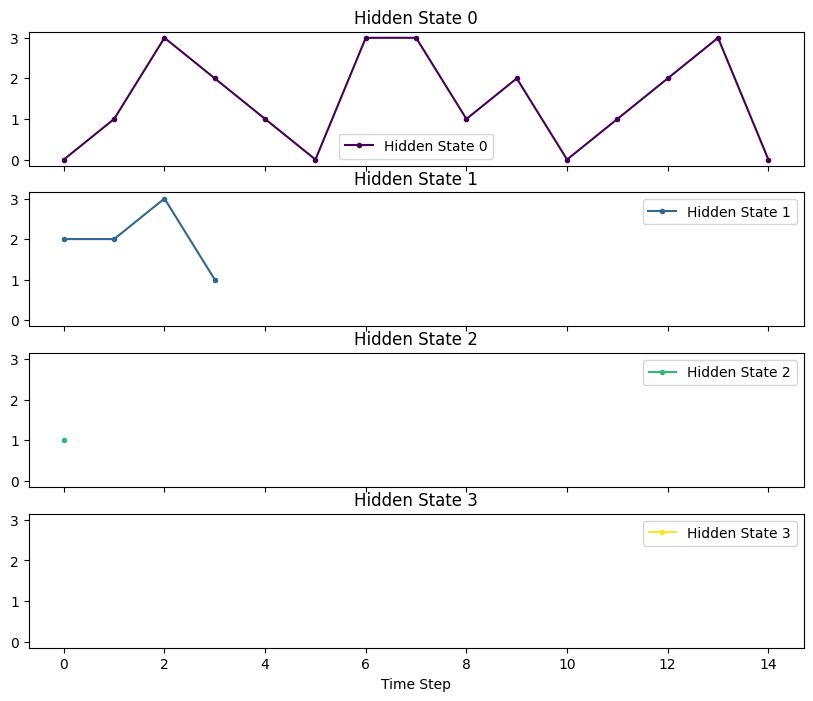

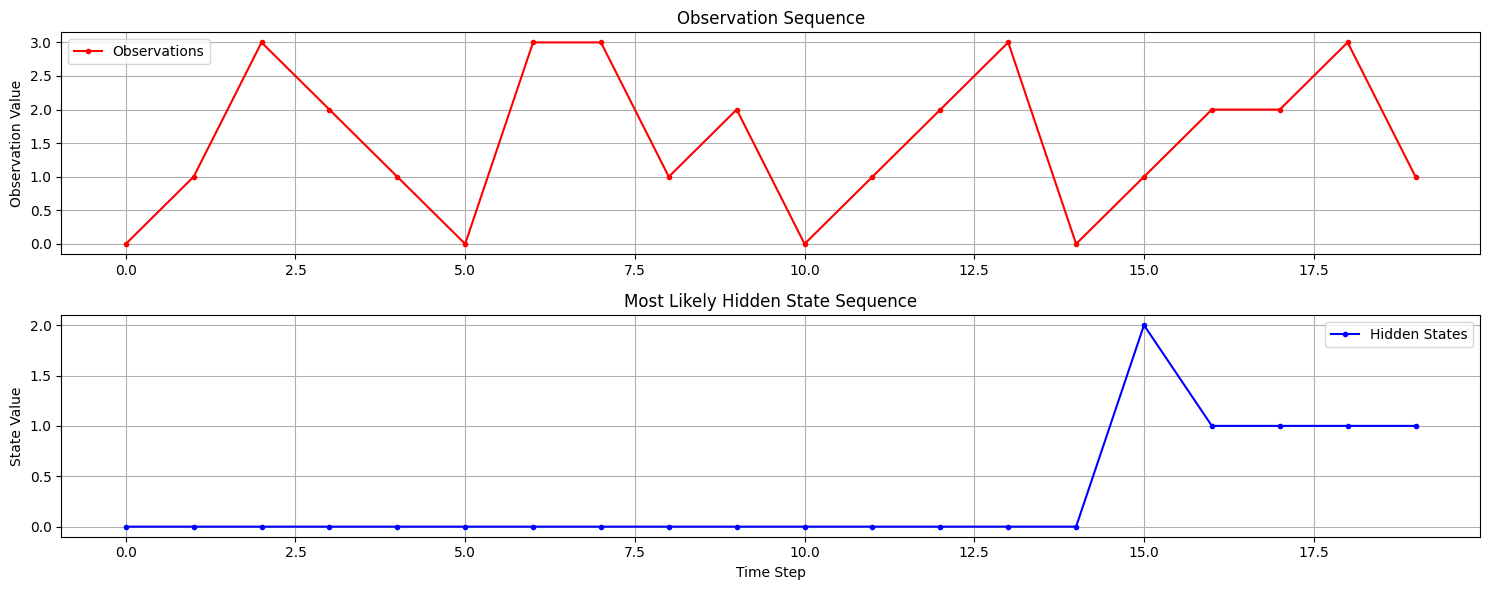

In [18]:
obs = observations.reshape(-1, 1)

plot_hidden_states(model, obs)


plt.figure(figsize=(15, 6))

# Plot observations
plt.subplot(211)
plt.plot(observations, "r.-", label="Observations")
plt.title("Observation Sequence")
plt.ylabel("Observation Value")
plt.grid(True)
plt.legend()

# Plot hidden states
plt.subplot(212)
plt.plot(optimal_path, "b.-", label="Hidden States")
plt.title("Most Likely Hidden State Sequence")
plt.xlabel("Time Step")
plt.ylabel("State Value")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Description:
The plots visually demonstrate how the model predicts the hidden states over time, based on the observation sequence and the HMM parameters.

first four plot show the observations assigned to Hidden State $i$

we can also see:
1. Dominance of Hidden State 0: The sequence is predominantly assigned to Hidden State 0, suggesting that it is the most likely state according to the model's parameters.

2. Limited Use of Other States: States 1, 2, and 3 are used much less frequently, indicating either parameter imbalances or that the observations are more aligned with the emission probabilities of Hidden State 0.

last 2 plots in order show the observations and most likely hidden state sequence




Now apply forward-backward algorithm:

In [21]:
def forward_backward(obs, A, B, pi):
    """
    Forward-Backward algorithm for HMMs.

    Parameters:
    obs : list
        Sequence of observed states (encoded as integers).
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    gamma : 2D numpy array
        Posterior probabilities of states at each time step.
    alpha : 2D numpy array
        Forward probabilities.
    beta : 2D numpy array
        Backward probabilities.
    """
    N = A.shape[0]  # Number of states
    T = len(obs)    # Number of observations

    # Initialize alpha with the initial probabilities
    alpha = np.zeros((N, T))
    alpha[:, 0] = pi * B[:, obs[0]]
    
    # Step 1: Forward procedure
    for t in range(1, T):
        for j in range(N):
            alpha[j, t] = np.sum(alpha[:, t-1] * A[:, j]) * B[j, obs[t]]

    # Step 2: Backward procedure
    beta = np.zeros((N, T))
    beta[:, T-1] = 1  # Initialize beta with 1 at the last observation

    for t in range(T-2, -1, -1):
        for i in range(N):
            beta[i, t] = np.sum(A[i, :] * B[:, obs[t+1]] * beta[:, t+1])

    # Step 3: Calculate the posterior probabilities (gamma)
    gamma = np.zeros((N, T))
    for t in range(T):
        gamma[:, t] = alpha[:, t] * beta[:, t]
        gamma[:, t] /= np.sum(gamma[:, t])  # Normalize to ensure probabilities sum to 1

    return gamma, alpha, beta


In [22]:
gamma, alpha, beta = forward_backward(observations, A, B, pi)
print("Posterior probabilities (gamma):", gamma)

Posterior probabilities (gamma): [[0.6146384  0.2848885  0.12835068 0.19955361 0.28907633 0.4095703
  0.14934406 0.10727323 0.17449579 0.2549887  0.48195597 0.27425174
  0.22183932 0.19962298 0.41576692 0.23393826 0.18015695 0.18966306
  0.13228975 0.18590041]
 [0.11813748 0.2232025  0.29284317 0.48576923 0.3255039  0.13374932
  0.20577366 0.27536529 0.37242092 0.44231516 0.15747749 0.28523268
  0.44327498 0.27145712 0.14723399 0.31266142 0.52991664 0.52592256
  0.343536   0.35434612]
 [0.1725203  0.43644251 0.37232498 0.11682914 0.31845804 0.27250425
  0.42082444 0.40141187 0.3786388  0.09911533 0.20470527 0.37797665
  0.13113364 0.29125424 0.25100225 0.3899755  0.11076301 0.1066552
  0.34424573 0.39476224]
 [0.09470382 0.05546649 0.20648117 0.19784803 0.06696172 0.18417613
  0.22405784 0.21594961 0.07444448 0.20358081 0.15586127 0.06253893
  0.20375206 0.23766565 0.18599684 0.06342482 0.1791634  0.17775918
  0.17992852 0.06499124]]
